# 3. Clustering
## After our analysis of the data we must now cluster the data accordingly
Importing approriate libraries

In [1]:
import pandas as pd
import seaborn as sn
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score
import seaborn as sns

ModuleNotFoundError: No module named 'pandas'

### First, we read in our data

In [53]:
index95 = pd.read_csv('data/index_95.csv')
index100 = pd.read_csv('data/index_100.csv')
index150 = pd.read_csv('data/index_150.csv')
win95 = pd.read_csv('data/wi_95.csv')
win100 = pd.read_csv('data/wi_100.csv')
win150 = pd.read_csv('data/wi_150.csv')
loss95 = pd.read_csv('data/lo_95.csv')
loss100 = pd.read_csv('data/lo_100.csv')
loss150 = pd.read_csv('data/lo_150.csv')
choice95 = pd.read_csv('data/choice_95.csv')
choice100 = pd.read_csv('data/choice_100.csv')
choice150 = pd.read_csv('data/choice_150.csv')

Cleaned data from processing

In [54]:
cleaned95 = pd.read_csv('data/cleaned95.csv', index_col='Unnamed: 0')
cleaned100 = pd.read_csv('data/cleaned100.csv', index_col='Unnamed: 0')
cleaned150 = pd.read_csv('data/cleaned150.csv', index_col='Unnamed: 0')

Initially, I decided to cluster based on the profit/loss margin for each subject and their most common choice. However, the most common choice would limit the clusters greatly I felt. There would only be 4 possible values (1,2,3 or 4) and this would limit what we could learn from the approriate cluster analysis. I looked into clustering on the number of times each deck was selected but this would involve multiple clusters, one for each choice against the profit margin but I decided against it. This lead me to going back to my data processing and creating the average choice column to add to my data. This was the sum of all the subjects selection divided by the number of trials and I felt this would provide better cluster analysis as a result as there would be far more variety in the range of values. I also decided to look into how many times subjects picked their most common choice. I felt this would give us a good overview of the respective studies and how they played the game, did they play safe and stick to what they know would win or would they attempt riskier decks in the hope of winning more? We are going to use our standardized data from our data processing as standardized data tends to work better with the k-means algorithm.

# K-Means analysis 

## Finding our value for k
#### Silhouette Scores for our  dataset
We now use another metric to test for the optimal number of clusters in our datasets. We try the silhouette coefficient which calculates the robustness of a clustering technique. This metric measures the degree of seperation between clusters. The score scales from -1 to 1. 1 means the clusters are very distinguished and perfectly easy to identify, 0 means the clusters are indifferent or hard to identify and -1 means the clusters are assigned in the wrong way. We will try to use this with our earlier elbow coefficient to confirm the optimal number of clusters for our datasets. The formula for the silhouette score is defined as follows:

$$
 silhouette - score = {b_{i} - a_{i} \over max(bi, a_{i})} \\
$$

In the formula above from [here](https://towardsdatascience.com/unsupervised-learning-techniques-using-python-k-means-and-silhouette-score-for-clustering-d6dd1f30b660) bi represents the shortest mean distance between a point to all points in any other cluster of which i is not a part whereas ai is the mean distance of i and all data points from the same cluster.

In [171]:
standard = pd.read_csv('data/standardized_all.csv', index_col='Unnamed: 0')
standard.head()

,Margin,Most Common Choice Picked,Most Common Choice,Average Choice,StudyNumber
0,1.044988,1.062672,1.234405,2.271920,-1.60938
1,-0.414346,-0.804770,1.234405,-0.410317,-1.60938
2,-0.474318,-0.559054,1.234405,0.268730,-1.60938
3,-0.294400,-0.559054,1.234405,0.370587,-1.60938
4,0.205371,-0.165908,1.234405,1.049635,-1.60938


In [172]:
for n in range(2, 11):
    km = KMeans(n_clusters=n)
#
# Fit the KMeans model
# Have to pick subset of columns as Study column is in string format
    km.fit_predict(standard)
#
# Calculate Silhoutte Score
#
    score = silhouette_score(standard, km.labels_, metric='euclidean')
#
# Print the score
#
    print('N = ' + str(n) + ' Silhouette Score: %.3f' % score)

N = 2 Silhouette Score: 0.313
N = 3 Silhouette Score: 0.289
N = 4 Silhouette Score: 0.267
N = 5 Silhouette Score: 0.273
N = 6 Silhouette Score: 0.279
N = 7 Silhouette Score: 0.290
N = 8 Silhouette Score: 0.299
N = 9 Silhouette Score: 0.303
N = 10 Silhouette Score: 0.308


#### Elbow Method

In [173]:
distortions_joined_st = []
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(standard)
    distortions_joined_st.append(kmeanModel.inertia_)

C:\Users\user\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


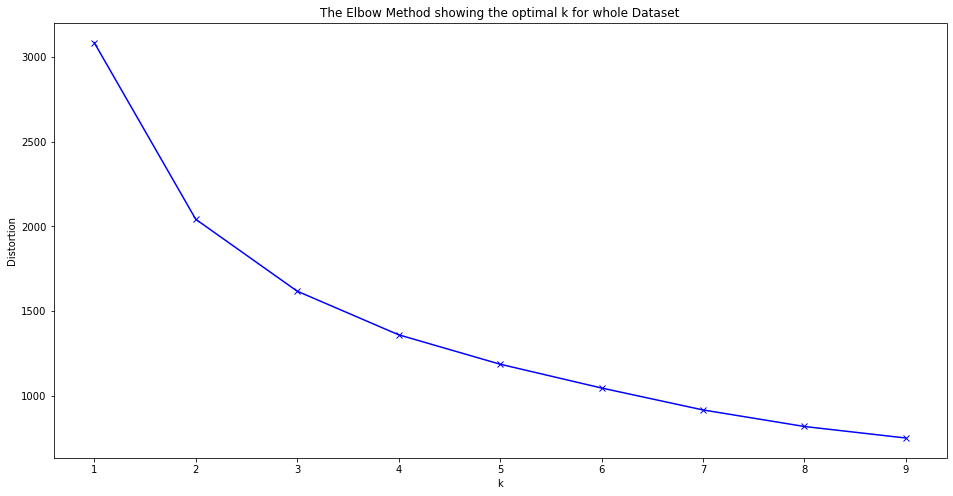

In [183]:
plt.figure(figsize=(16,8))
plt.plot(K, distortions_joined_st, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k for whole Dataset')
plt.show()

Looking at our elbow method and silhouette scores for the dataset as whole we can conclude using k=2 or k=3 is a safe value to use for the amount of clusters in our data.

## Now we look at what we will cluster on in our data

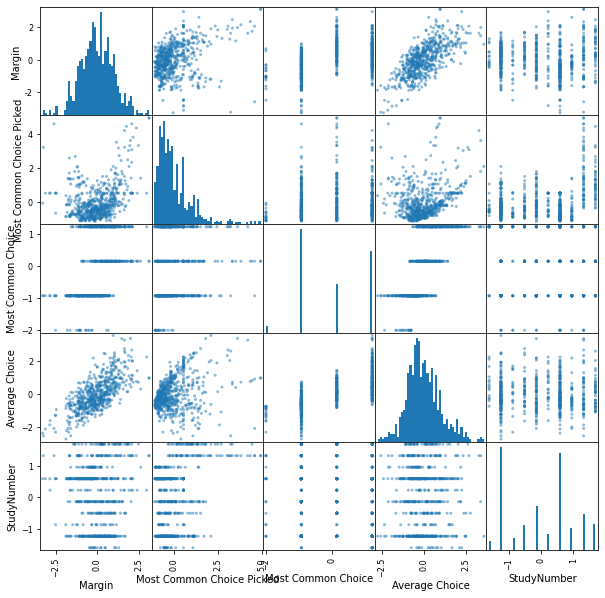

In [175]:
pd.plotting.scatter_matrix(standard, figsize=(10,10), hist_kwds=dict(bins=50), cmap="Set1")
plt.show()

After looking at this scatterplot comparing the various columns against each other in a scatter plot I felt it might be worth looking into how regularly a participant picked their most common choice and the profit margins. We could further look into this by looking at what was their most common choice and the respective study they belonged to.

In [176]:
kmeans_margin_standard = KMeans(n_clusters=3).fit(standard[["Margin", "Most Common Choice Picked"]])
centroids_betas_standard = kmeans_margin_standard.cluster_centers_

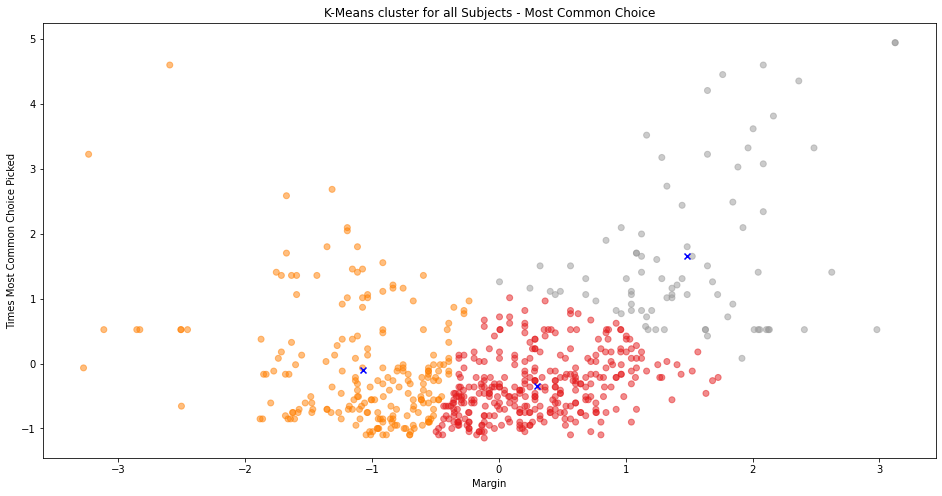

In [177]:
plt.figure(figsize=(16,8))
plt.scatter(standard['Margin'], standard['Most Common Choice Picked'], c= kmeans_margin_standard.labels_, cmap = "Set1", alpha=0.5)
plt.scatter(centroids_betas_standard[:, 0], centroids_betas_standard[:, 1], c='blue', marker='x')
plt.title('K-Means cluster for all Subjects - Most Common Choice')
plt.xlabel('Margin')
plt.ylabel('Times Most Common Choice Picked')
plt.show()

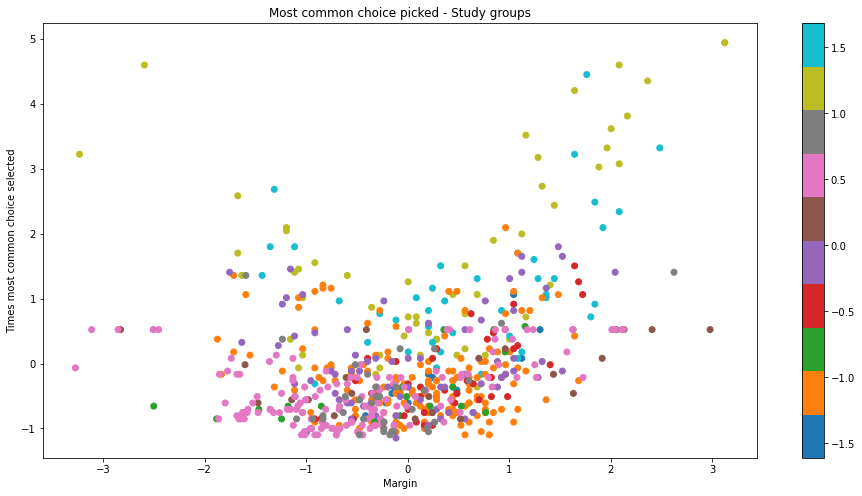

In [182]:
plt.figure(figsize=(16,8))
plt.scatter(standard['Margin'], standard['Most Common Choice Picked'], c=standard['StudyNumber'], cmap='tab10')
plt.title("Most common choice picked - Study groups")
plt.xlabel('Margin')
plt.ylabel('Times most common choice selected')
plt.colorbar()

From earlier our studies are as follows: Fridberg: 0, Horstmann: 1, Kjome: 2, Maia: 3, SteingroverInPrep: 4, Premkumar: 5, Wood: 6, Worthy: 7, Steingroever2011: 8 and Wetzels: 9. Immediately we notice our neon scatters here on both the left and right side of the plot. There is a large amount of subjects from Steingroever2011's study that regularly pick their favoured outcome, a lot of these can be seen to the right of the plot in the more profitable outcome while picking this selection 100 trials or more in the 150 trial experiment. The majority of this study picks their most common choice at least 80 times or more from our plot also. We can see a couple of outliers in this study also, picking their favoured outcome well over a hundred times with poor results. Again, this study is based on the youngest specifically mentioned mean of subjects (19.9 years old) and it certainly seems to play a part in their decision making. We can see from our scatterplot something similar with the Wetzels study, a student based study with a noticeable group of these subjects picking their favoured choice 80 times or more and winning money over the course of their trials. It is also interesting to note the clusters to the left and centre from our K-means plot containing a sizable proportion of subjects from the Wood study (in pink). This is a particularly interesting study as the first 90 participants were between the ages of 18-40 and the rest had a mean age of 76.98 years old. Despite it being a 100 trial study the vast majority of this study pick their preferred choice around 40-50 times, less than or equal to half of their trials. A lot of these participants also lose money over the course of their trials which raises interesting questions about how age can impair decision making. It is interesting to note when researching the Wood et al study that it was regarded as an outlier in that age over time impairs performance in the IGT {cite:p}`beitziowa`. However, in general it is seen as something that can negatively impact decision making over time. It also suggests in [here](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4115037) in later adulthood that a low loss strategy is seen more predominately than the end profit. The Horstmann study follows a similar dispersion to the Woods study with a large amount of subjects centred around the middle cluster and also picking their preffered choice 40-50 out of 100 trials which could be seen as a relatively low numbers and maybe hints at an adaptive approach to the game, where after a period of maybe settling for preferred decks they adapt as their wins/losses dictate. With a similar number of participants in this trial to the Woods trial the one key difference is far more of these subjects lean to the right cluster (breaking even or making a marginal gain). Again, looking at the age demography this is a young adult group with a mean age of 25.6 years old. Something suggested in [here](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4115037) could hold true here in that adults past adolescence prefer experimental decision making instead of just frequency preference. This could also explain the cohort of the Horstmann study who followed a similar decision making process (40-50 most common choice) but lost money in the end. Another study which also has an interesting cluster is the Worthy study, which has 35 subjects the majority of which (22) is female. This study contains a lot of subjects who picked their most common choice less than 40 times and very few subjects are above 50 or so. It is something that ties in with some of the potential behavioural findings of {ref} `denbosgender` in that women are more sensitive to losses in the long term profitable decks. This would explain the constant tinkering between the decks and the lower most common choice value among many subjects in this study. The aforementioned Horstmann study also has a large number of female participants in it (82/162) and as mentioned previously has similarly lower count of the times the most common choice was picked. It is something mentioned in {ref} `denbosgender2` that women pick more disadvantageous decks as they mix a policy of exploration and exploitation, whereas as men will after initial exploration focus on exploitation then. This could definitely explain why these studies with a lower common choice pick and specified amount of females taking part in the study have a more mixed approach to the task and why they float around breaking even. They obviously accept some losses in exploration but exploit the winning cards regularly enough to be around even.

## Next we look at the clusters involving a subject's average choice and the profit / loss margin they made.

In [179]:
kmeans_margin_average_st = KMeans(n_clusters=3).fit(standard[["Margin", "Average Choice"]])
centroids_betas_average_st = kmeans_margin_average_st.cluster_centers_

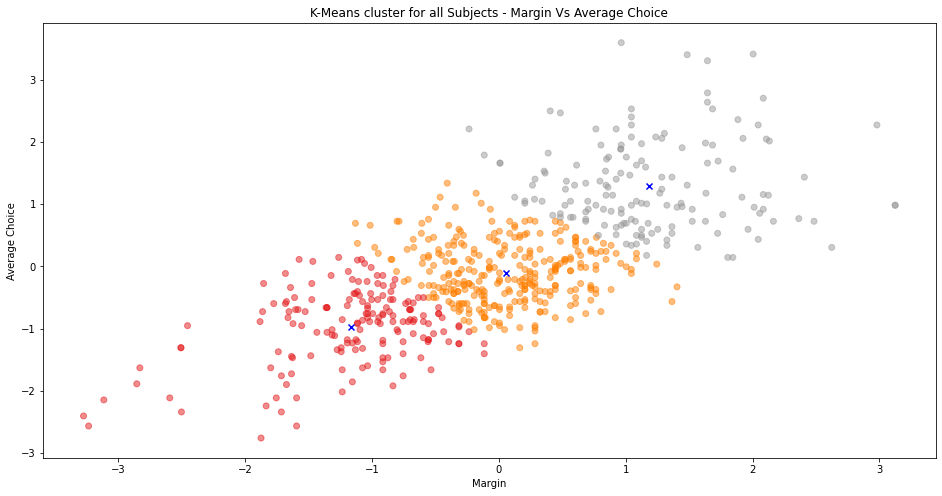

In [180]:
plt.figure(figsize=(16,8))
plt.scatter(standard['Margin'], standard['Average Choice'], c= kmeans_margin_average_st.labels_, cmap = "Set1", alpha=0.5)
plt.scatter(centroids_betas_average_st[:, 0], centroids_betas_average_st[:, 1], c='blue', marker='x')
plt.title('K-Means cluster for all Subjects - Margin Vs Average Choice')
plt.xlabel('Margin')
plt.ylabel('Average Choice')
plt.show()

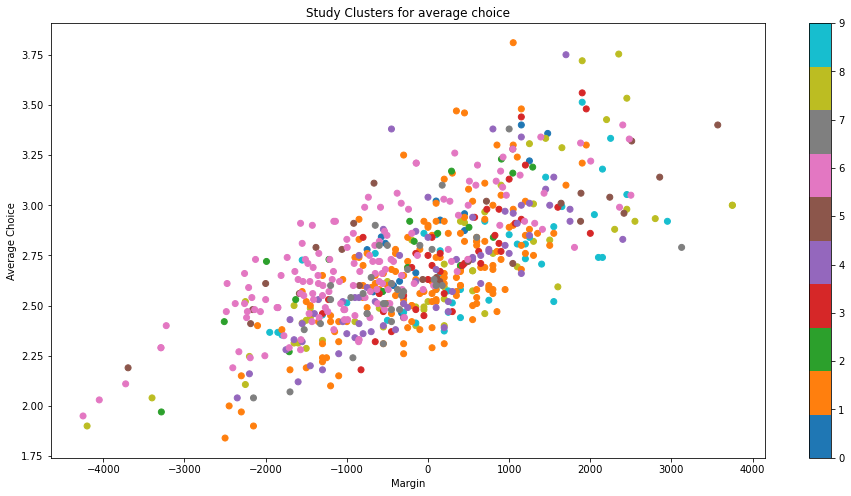

In [181]:
plt.figure(figsize=(16,8))
plt.scatter(joined['Margin'], joined['Average Choice'], c=joined['StudyNumber'], cmap='tab10')
plt.title("Study Clusters for average choice")
plt.xlabel('Margin')
plt.ylabel('Average Choice')
plt.colorbar()

Using our colour bar we can deduce the clusters from what study they are a part of. If we look at the cluster to the left in our k-means scatter plot we can see that a substantial amount of this cluster contains subjects from the Wood et al study. It is interesting to note this had the highest mean average age of any study in the datasets. It also had a large number of participants but looking at the scatter plot very few participants made money over the course of the trials. The majority had an average choice of below 3 and certainly fell into the category of average lower choice and lower financial gain. This study also features heavily in the second cluster (the one most central) and this cluster also contains subjects who struggled to break even. The Horstmann study also features heavily in this cluster as does the Worthy study in yellow. The Worthy study leans more towards the first cluster again in the lower choice average, lower money made category. It is interesting to note that this study does not explicitly state the age demography of the group studied but tells us it was a solely female, undergraduate student study, which hints at it being a younger age group. In the third cluster to the right, which is the higher average choice, higher profit group we can see a large mix of groups with comparatively less subjects in this cluster compared to the other two. We can see a significant amount of subjects from the Maia study and also quite a few from the previously mentioned Horstmann study. We also see even with a small sample size from the study there is a significant number of Premkumar participants in this profitable cluster. Two of these studies contain a very young mean age again. The Maia study is another that focuses on undergraduate students again, but with better results than previous. 

Looking at this graph we can see how these studies was very profitable with it clear to see from the scatter plot the majority broke even or made money. We can also easily tell which study made more money than the other from this scatter plot too with the vast majority of the Wetzels studies equal or above a profit margin of 0 dollars. The cluster primarily consists of Steingroever2011's subjects which confirms our earlier analysis that this group made little over half the profit of Wetzels study. The central cluster is much more even, with possibly a few more from the Wetzels study than the Steingroever study. Again, the right most cluster has a fairly even split between the two studies with Wetzels subjects claiming some larger profit margins in contrast to the Steingroever study. It is interesting to note both studies had two cards with a payoff in the decks and both appeared to use similiar age demographies (Wetzels used students, Steingroever a mean average age of 19.9 years old). The larger number of subjects used in the Steingroever study could be attributed to why the winnings were larger in the Wetzels study as boh studies had 2 cards that paid out. Definitely from looking at this graph and our other clusters younger age profiles, particularly students, seem to be more profitable in this task. We also can see that an average card choice of between 3 and 3.25 appears most profitable from our 3 cluster analysis. Higher values closer to 4 also pay well but not as well as between the aforementioned range, while an average value of under 2.5 is detrimental to participants.